In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Combined_QB.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_accuracy_percent', 'weighted_avg_aimed_passes',
       'weighted_avg_attempts', 'weighted_avg_avg_depth_of_target',
       'weighted_avg_avg_time_to_throw', 'weighted_avg_bats',
       'weighted_avg_big_time_throws', 'weighted_avg_btt_rate',
       'weighted_avg_completion_percent', 'weighted_avg_completions',
       'weighted_avg_declined_penalties', 'weighted_avg_def_gen_pressures',
       'weighted_avg_drop_rate', 'weighted_avg_dropbacks',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass', 'weighted_avg_grades_run',
       'weighted_avg_hit_as_threw', 'weighted_avg_interceptions',
       'weighted_avg_passing_snaps', 'weighted_avg_penalties',
       'w

In [4]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)


In [25]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       QB        11.439957         24.060673         11.0   
50   49ers  2020       QB         0.610494         34.317120         15.0   
70   49ers  2021       QB        17.863014        528.923536         11.0   
123  49ers  2022       QB         6.959654        412.212335         15.0   
12   Bears  2019       QB         7.396387        434.985593         15.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         15.0     64.331406    77.900000     27.90%  ...   
50         11.0     77.900000    61.558114      5.40%  ...   
70         15.0     61.558114    72.551515     19.50%  ...   
123        17.0     72.551515    71.909475     27.60%  ...   
12          9.0     62.198104    64.653902     -2.10%  ...   

     Previous_sack_percent  Previous_sacks  Previous_scrambles  \
17                8.019063       16.592188            4.965625   
50                6.800000      

In [26]:
team_data = df.groupby('Team')
print(team_data.head)


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x16c68dfa0>>


In [48]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['weighted_avg_qb_rating', 'Current_PFF', 'weighted_avg_grades_pass', 'weighted_avg_big_time_throws', 'Value_cap_space', 'weighted_avg_sack_percent', 
                'weighted_avg_twp_rate']]
  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Net EPA']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [49]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[102.          77.9         75.7         13.          11.43995749
     6.8          3.4       ]
  [ 90.24605873  61.55811437  60.39690881   7.38485317   0.61049445
     6.34945904   4.5137558 ]
  [ 98.48080808  72.55151515  71.13686869   8.9040404   17.8630137
     5.69292929   4.5530303 ]]

 [[ 84.07037572  64.65390173  64.42196532  18.1734104    7.39638682
     6.93106936   3.44566474]
  [ 86.73453237  64.11294964  62.75971223  13.45323741   8.06760848
     5.36115108   4.44748201]
  [ 76.22885714  65.11014286  61.79014286  11.71285714   6.39452055
     8.79271429   3.56214286]]

 [[ 75.65215577  60.80876217  60.30166898  15.24617524   9.24017003
     7.04255911   4.6108484 ]
  [ 85.51304985  69.71950147  68.8627566   11.97653959   0.61049445
     7.33343109   3.53695015]
  [106.62876304  88.60789866  88.10163934  32.80923994   5.34794521
     8.71892697   2.4       ]]

 [[ 82.36        62.62285714  60.82857143  12.05714286   3.50159405
     6.72571429   4.45428571]
  [106.37224607

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [52]:
# Define the input layer
inputs = Input(shape=(3, 7))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)


In [53]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [54]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.5393 - val_loss: 0.0382
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2329 - val_loss: 0.0451
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1847 - val_loss: 0.0320
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2051 - val_loss: 0.0924
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1981 - val_loss: 0.0845


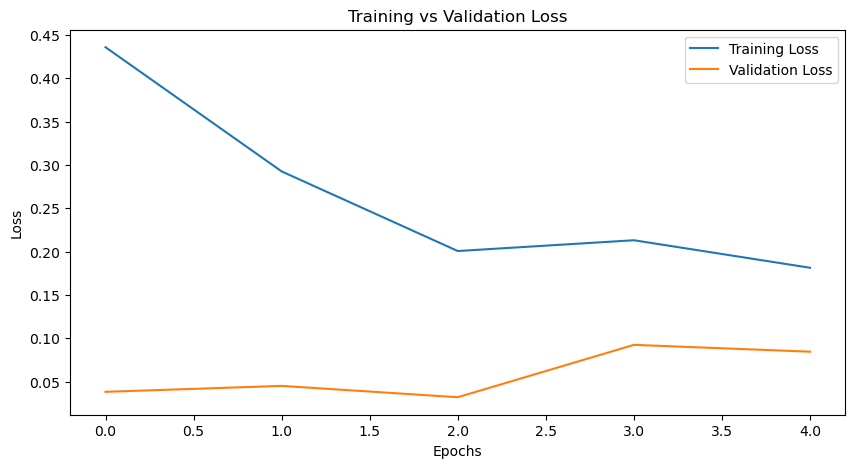

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
R² Score: -7.0019


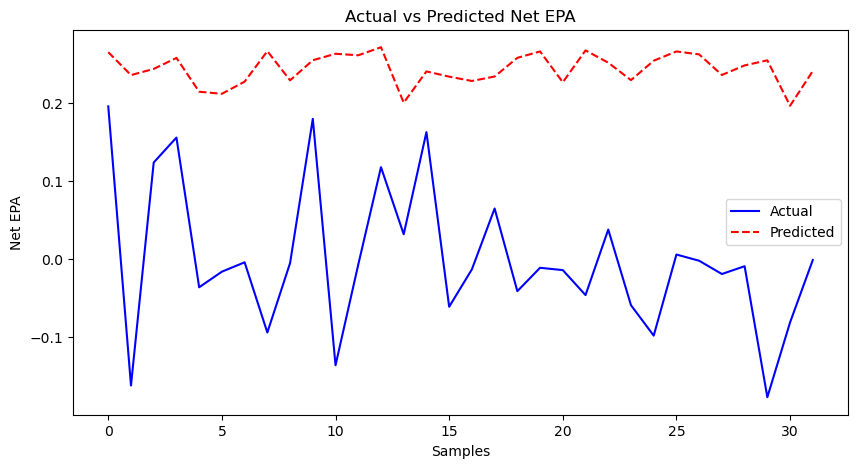

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1368 - val_loss: 0.0206
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1502 - val_loss: 0.0046
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0585 - val_loss: 0.0142
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1401 - val_loss: 0.0064
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0734 - val_loss: 0.0101
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0734 - val_loss: 0.0303
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0592 - val_loss: 0.0172
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0537 - val_loss: 0.0055
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0812 - val_loss: 0.0170
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0507 - val_loss: 0.0060


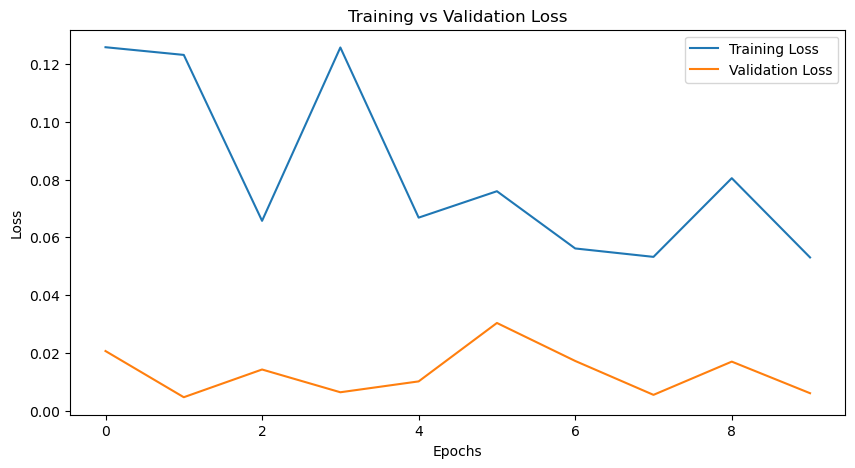

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R² Score: -0.3577


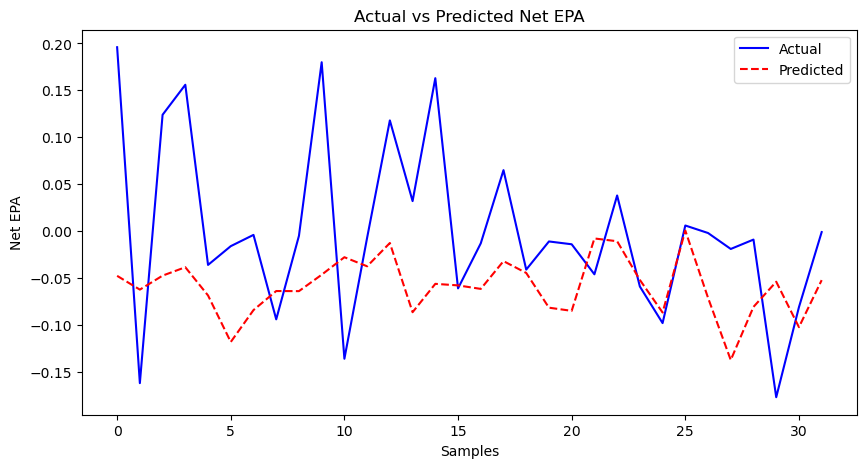

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0394 - val_loss: 0.0063
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0507 - val_loss: 0.0074
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - val_loss: 0.0060
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - val_loss: 0.0046
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0254 - val_loss: 0.0044
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0312 - val_loss: 0.0093
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0333 - val_loss: 0.0118
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0479 - val_loss: 0.0067
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - val_loss: 0.0077
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - val_loss: 0.0074
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - val_loss: 0.0101
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - val_loss: 0.0137
Epoch 13/15


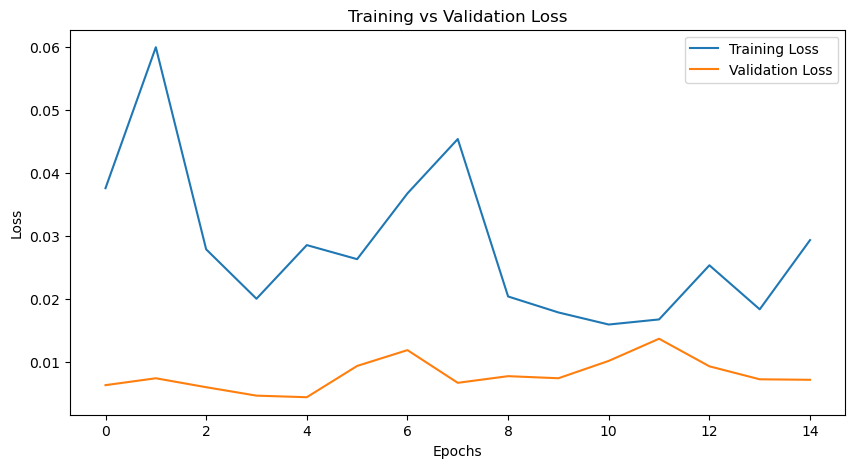

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.0208


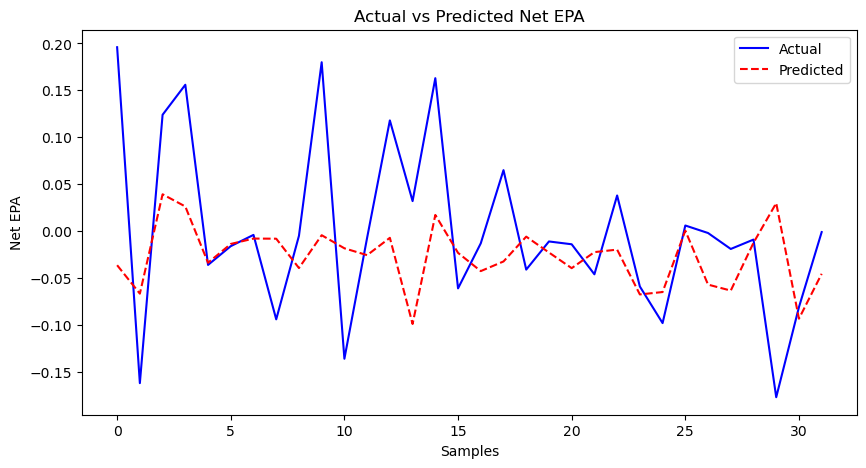

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0261 - val_loss: 0.0076
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0262 - val_loss: 0.0079
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - val_loss: 0.0075
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0218 - val_loss: 0.0098
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - val_loss: 0.0115
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - val_loss: 0.0106
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - val_loss: 0.0092
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0306 - val_loss: 0.0084
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - val_loss: 0.0094
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - val_loss: 0.0101
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - val_loss: 0.0129
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - val_loss: 0.0142
Epoch 13/20

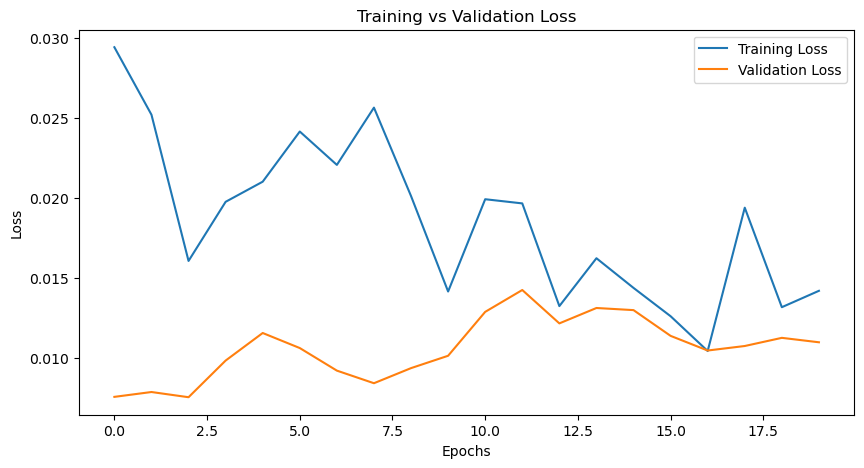

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.0104


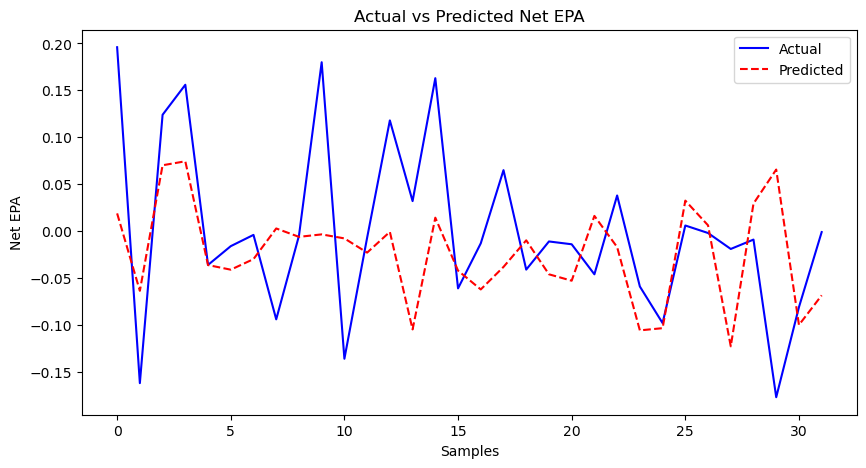

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122 - val_loss: 0.0117
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - val_loss: 0.0123
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - val_loss: 0.0132
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - val_loss: 0.0130
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 - val_loss: 0.0114
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - val_loss: 0.0111
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - val_loss: 0.0114
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - val_loss: 0.0113
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - val_loss: 0.0127
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - val_loss: 0.0149
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - val_loss: 0.0120
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - val_loss: 0.0095
Epoch 13/25

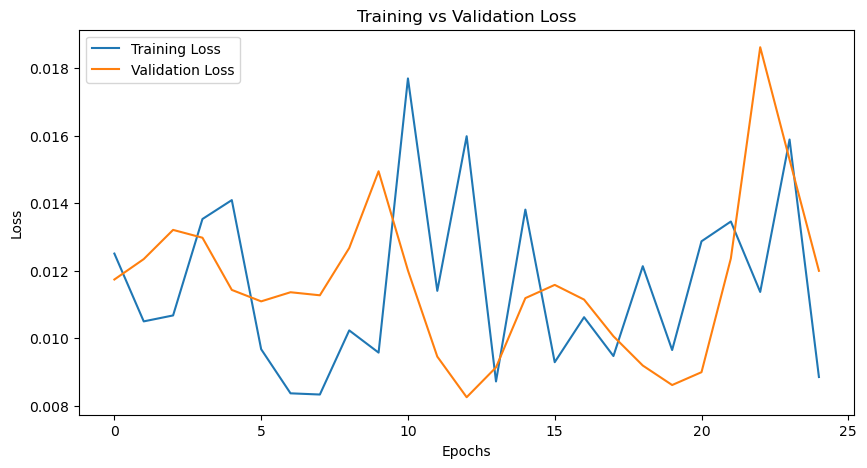

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: -0.0069


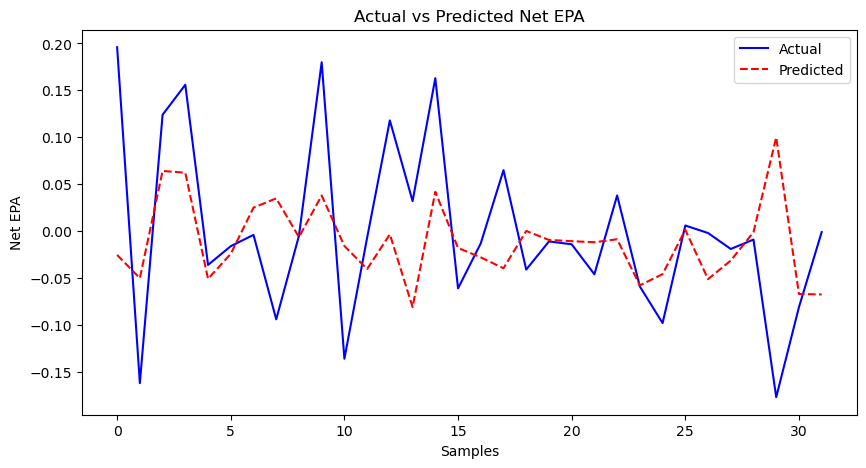

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0137 - val_loss: 0.0126
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0111 - val_loss: 0.0157
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - val_loss: 0.0140
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - val_loss: 0.0130
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - val_loss: 0.0116
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - val_loss: 0.0106
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - val_loss: 0.0111
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - val_loss: 0.0108
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - val_loss: 0.0105
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - val_loss: 0.0074
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - val_loss: 0.0068
Epoch 13/30


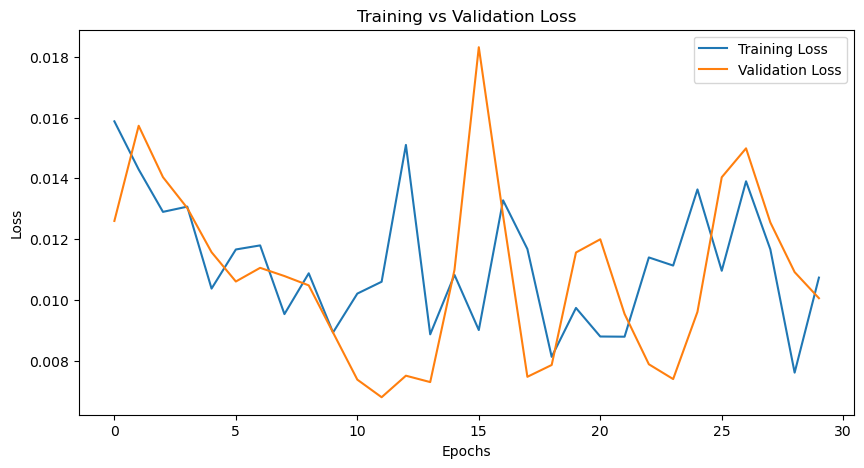

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: -0.0629


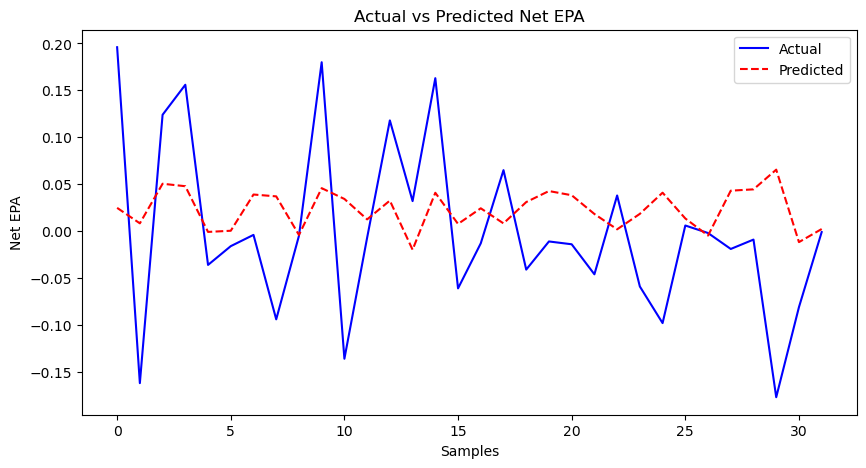

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - val_loss: 0.0102
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - val_loss: 0.0104
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - val_loss: 0.0091
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - val_loss: 0.0089
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0099
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - val_loss: 0.0096
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - val_loss: 0.0088
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - val_loss: 0.0119
Epoch 13/50


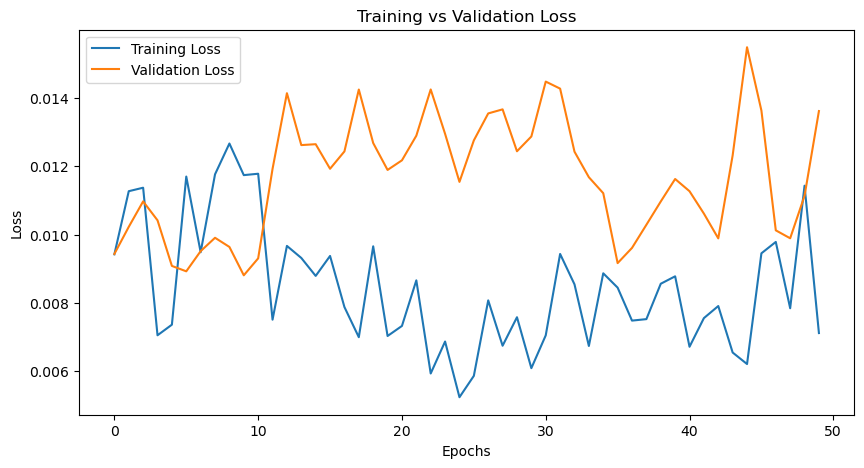

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.1052


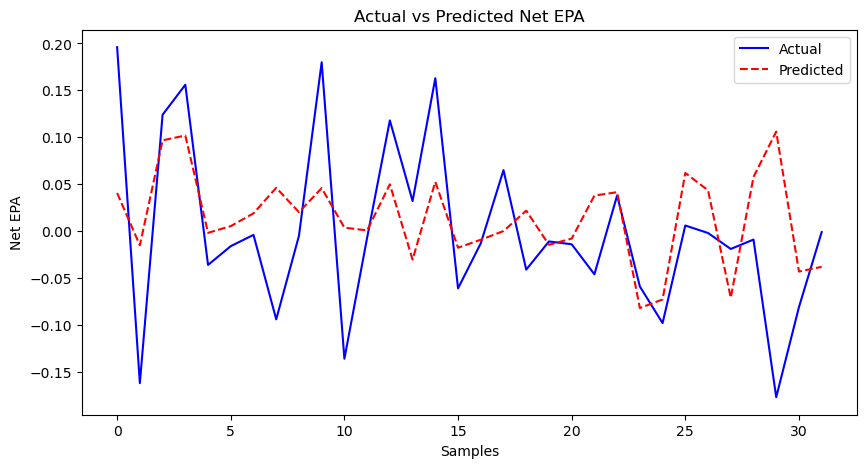

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - val_loss: 0.0141
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - val_loss: 0.0138
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - val_loss: 0.0147
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0060 - val_loss: 0.0164
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - val_loss: 0.0168
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - val_loss: 0.0152
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - val_loss: 0.0135
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - val_loss: 0.0122
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - val_loss: 0.0122
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - val_loss: 0.0130
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - val_loss: 0.0137
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - val_loss: 0.0127

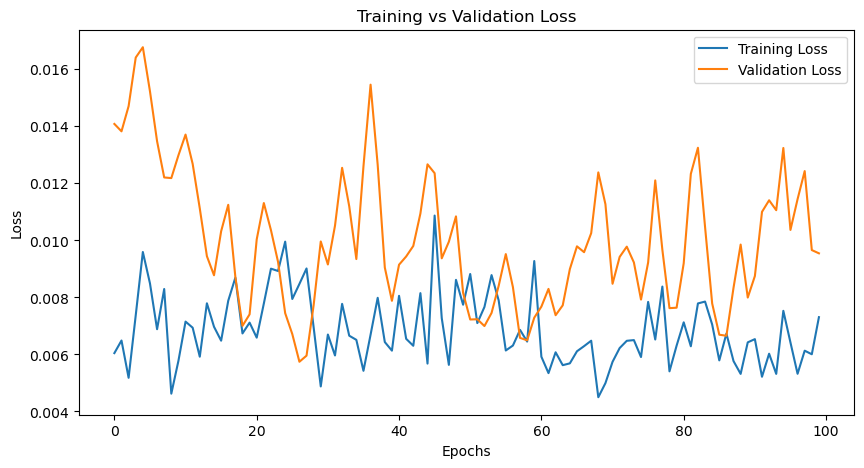

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R² Score: -0.1037


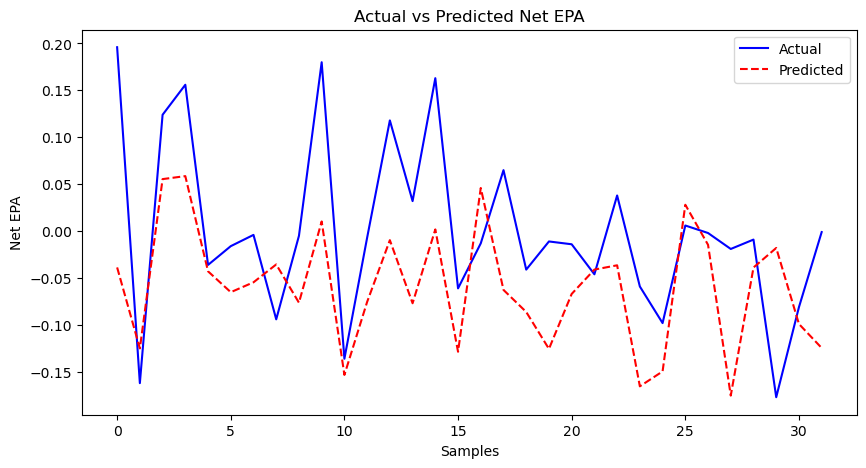

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0120 - val_loss: 0.0092
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - val_loss: 0.0107
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - val_loss: 0.0108
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - val_loss: 0.0089
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - val_loss: 0.0095
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - val_loss: 0.0108
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - val_loss: 0.0111
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - val_loss: 0.0088
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - val_loss: 0.0079
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - val_loss: 0.0091
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - val_loss: 0.0096
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - val_loss: 0.0090


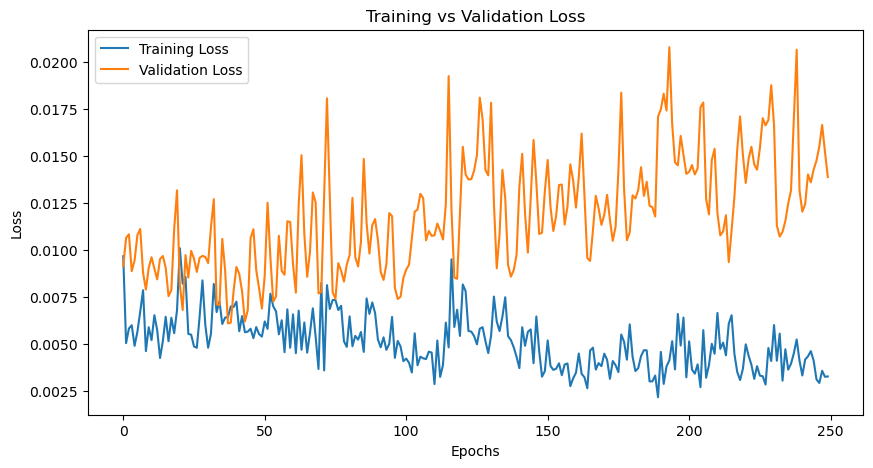

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
R² Score: 0.2650


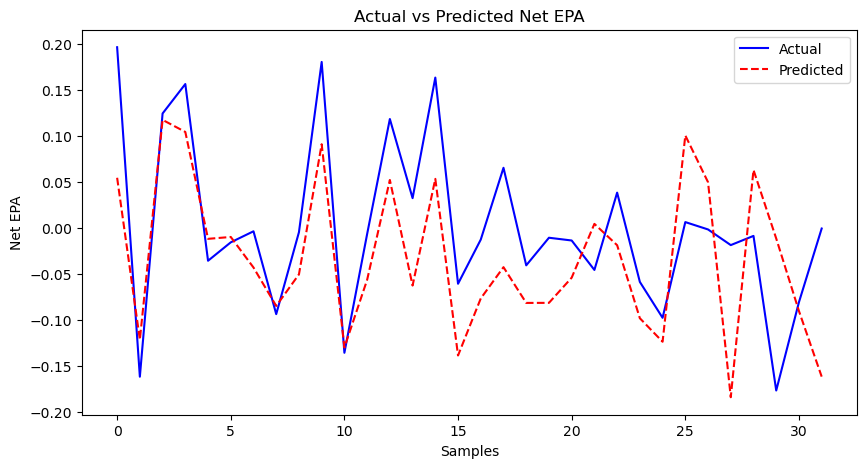

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042 - val_loss: 0.0152
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - val_loss: 0.0138
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - val_loss: 0.0127
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - val_loss: 0.0162
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 0.0166
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 0.0153
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0170
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - val_loss: 0.0155
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - val_loss: 0.0153
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - val_loss: 0.0144
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - val_loss: 0.0145
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - val_loss: 0.0159


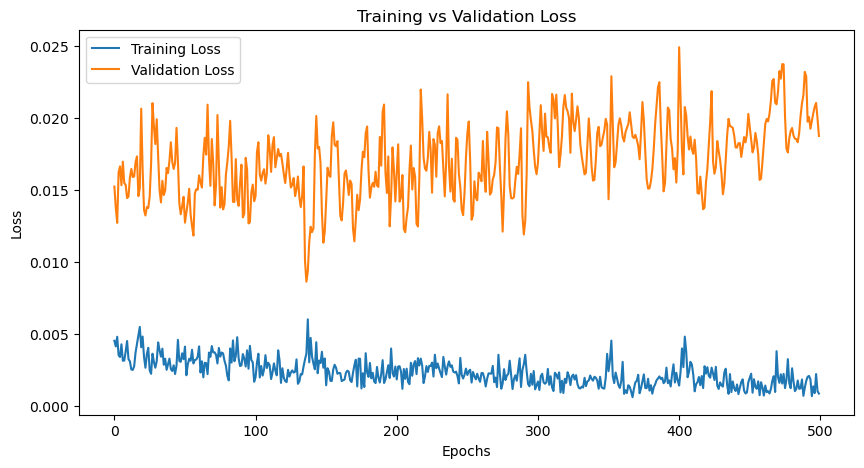

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R² Score: 0.4728


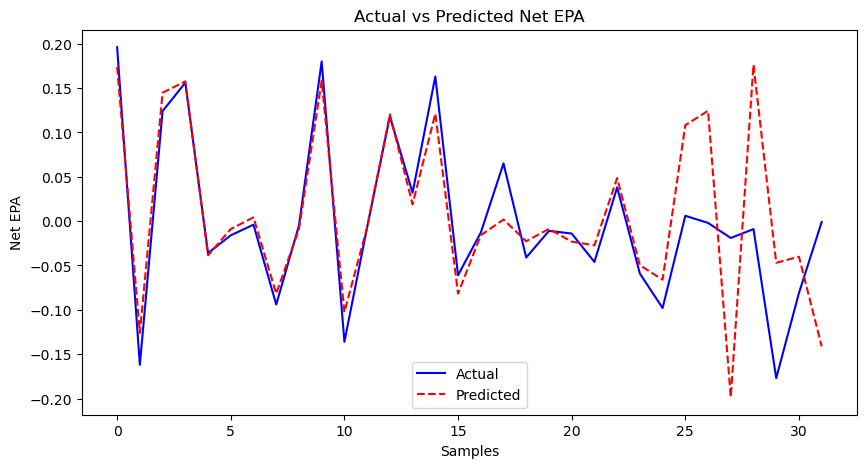

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - val_loss: 0.0201
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 0.0237
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.8354e-04 - val_loss: 0.0234
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 0.0213
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_loss: 0.0205
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - val_loss: 0.0214
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0187
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - val_loss: 0.0193
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - val_loss: 0.0183
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 0.0163
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - val_loss: 0.0170
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - v

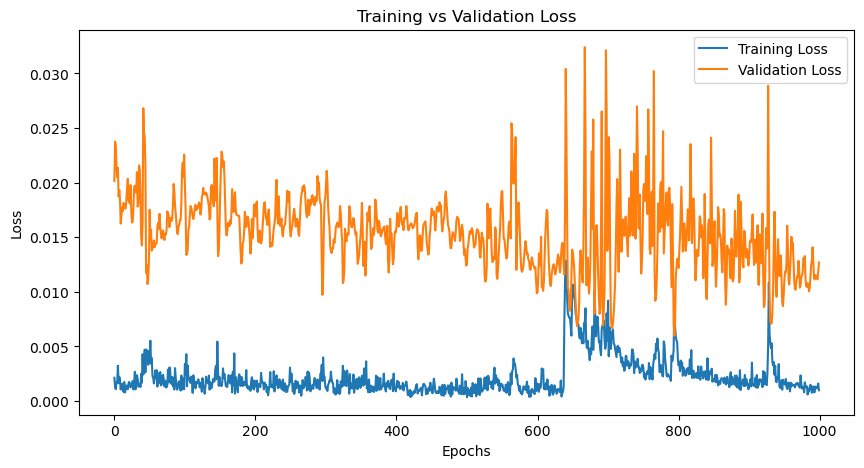

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.6327


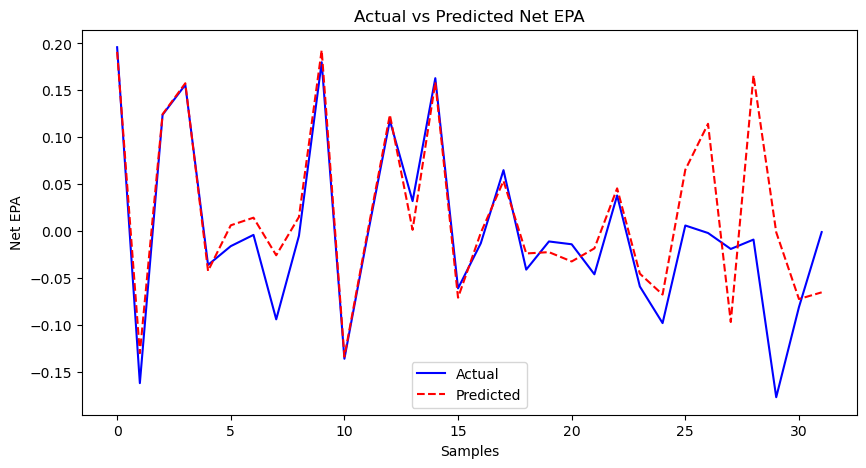

In [ ]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250, 500, 1000]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Net EPA')
    plt.xlabel('Samples')
    plt.ylabel('Net EPA')
    plt.legend()
    plt.show()



